In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

%matplotlib inline

In [21]:
# Load the data from the method
boston = load_boston()

# Take the feature data and load into DataFrame to explore
features = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=['target'])

In [22]:
data = pd.concat([features, target], axis=1)

In [113]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [93]:
X = data['RM']
y = data['target']

X = np.array(X/X.mean())
y = np.array(y/y.mean())

n = int(0.8 * len(X))

x_train = X[:n]
y_train = y[:n]

x_test = X[n:]
y_test = y[n:]


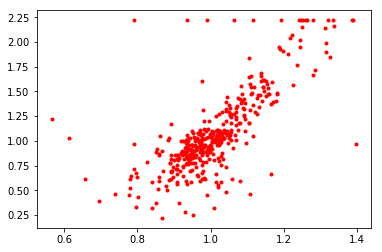

In [94]:
plt.plot(x_train, y_train, 'r.')

In [95]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [96]:
# Hypothesis Function
def h(a,x,b):
    return a * x + b

# Error Function

def error(a,x,b,y):
    e = 0
    m = len(x)
    for i in range(m):
        e += np.power((h(a,x[i],b) - y[i]), 2)
        
    return (1/(2*m)) * e

# Step gradient Function

def step_gradient(a,x,b,y, learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        grad_a += 2/m * (h(a,x[i],b) - y[i]) * x[i]
        grad_b += 2/m * (h(a,x[i],b) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    
    return a, b, c, d


def descend(initial_a, initial_b, x, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    for i in range(iterations):
        e = error(a, x, b, y)
        if i % 1000 == 0:
            print("Error: %4f a:%4f  b:%4f" %(e,a,b))
            
        a, b = step_gradient(a, x, b, y, learning_rate)
        
    return a, b



In [97]:
a = 1.662822 
b = -0.596120
learning_rate = 0.01
iterations = 10000

final_a, final_b = descend(a, b, x_train, y_train, learning_rate, iterations)

Error: 0.043644 a:1.662822  b:-0.596120
Error: 0.042130 a:1.784883  b:-0.719951
Error: 0.040972 a:1.891657  b:-0.828273
Error: 0.040085 a:1.985057  b:-0.923028
Error: 0.039407 a:2.066760  b:-1.005915
Error: 0.038888 a:2.138229  b:-1.078420
Error: 0.038491 a:2.200747  b:-1.141845
Error: 0.038187 a:2.255434  b:-1.197325
Error: 0.037954 a:2.303272  b:-1.245857
Error: 0.037777 a:2.345119  b:-1.288310


In [98]:
print(error(a,x_test,b,y_test))
print(error(final_a, x_test, final_b, y_test))

0.0749088336704
0.0725336068027


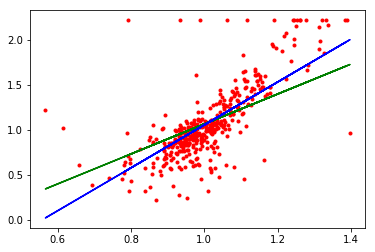

In [99]:
plt.plot(x_train, y_train, 'r.', x_train, h(a, x_train, b), 'g', x_train, h(final_a, x_train, final_b), 'b', )

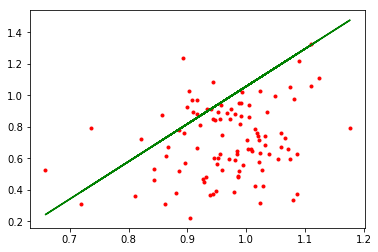

In [100]:
plt.plot(x_test, y_test, 'r.', x_test, h(final_a, x_test, final_b), 'g')